## Welcome to Starscream Notebooks

Imported modules:

- `from datetime import datetime`
- `from shopify import suds`
- `import pandas as pd`
- `import numpy as np`
- `import matplotlib`
- `import matplotlib.pyplot as plt`
- `from starscream.datasource import read`
- `from starscream.datasource import RDD, DATAFRAME, CQUERY`

If you want to read arbitrary data from hdfs use : `read(uri,...)` run `help(read)` for info.

In [241]:
from sklearn.cluster import KMeans
import sys
import json
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import random

In [231]:
TWEETER_FEEDS = [
	'nytimes', 'thesun', 'thetimes', 'ap', 'cnn']
#	'cnn', 'bbcnews', 'cnet', 'msnuk', 'telegraph']
#				  usatoday, wsj, washingtonpost, bostonglobe, newscomauhq, skynews, sfgate,##
#				  ajenglish, independent, guardian, latimes, reutersagency, abc, business, bw, time,]

#feature_data = open('/Users/lukekumar/Documents/Twitter-App/NYTimes-7500.csv', 'r')
X = []
for feed in TWEETER_FEEDS:
    print feed
    feature_data 	 = open('/Users/lukekumar/Documents/Twitter-App/processed_tweets/'+feed+'-tweet.csv', 'r')
    for line in feature_data:
        X.append(map(float, line.split(',')))
    feature_data.close()

X = np.array(X)
print X.shape

nytimes
thesun
thetimes
ap
cnn
(16102, 7500)


In [252]:
#for num_clus in range(35, 100, 5):
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,
                random_state=0, 
                n_init=10,
                init='k-means++',
                verbose=0, 
                max_iter=300).fit(X)

print "clusters: ", num_clusters, "\tcluster inertia: ", kmeans.inertia_

print "cluster centers:\n", kmeans.cluster_centers_
open('cluster_centres.csv', 'w').writelines(','.join(map(str, kmeans.cluster_centers_.tolist())))


cluster_labels = kmeans.labels_

clusters:  5 	cluster inertia:  1103387.70638
cluster centers:
[[ 0.04694254  0.04122931  0.01183512 ...,  0.          0.          0.        ]
 [ 0.03537663  0.03165833  0.01684571 ...,  0.          0.          0.        ]
 [-0.11755982  0.01921911  0.02266818 ...,  0.          0.          0.        ]
 [-0.191406    0.291016    0.138672   ...,  0.          0.          0.        ]
 [ 0.01862366  0.03629753  0.0255144  ...,  0.          0.          0.        ]]


In [262]:
#del X
tweets = []
feed_names = []
for feed in TWEETER_FEEDS:
    idx = 0
    tweet_data = open('/Users/lukekumar/Documents/Twitter-App/downloaded_tweets/'+feed+'-tweet.json', 'r')
    for line in tweet_data:
        data_dict = json.loads(line)
        tweets.append(data_dict['text']) 
        feed_names.append(data_dict['user']['screen_name'])
    tweet_data.close()

tweets = np.array(tweets)
feed_names = np.array(feed_names)

cluster_counts = {}
for clus in range(num_clusters):
    index = np.where(cluster_labels == clus)[0]
    sample = random.sample(index, 5)
    # cluster_counts[clus] = len(index)
    # print index
    print "\ntweets cluster: ", clus, ' count: ', len(index), '\n'
    print tweets[sample]
    print feed_names[sample]


tweets cluster:  0  count:  4997 

[ u'Channel 5 are launching their filthiest show yet https://t.co/KQtOc97EcN https://t.co/6UqO9Yf1z5'
 u'Joni Sledge, a member of the group Sister Sledge, dies at 60, according to her family. https://t.co/XarPeEDi7g'
 u'A criminal investigation of Volkswagen\u2019s diesel fraud escalated on Wednesday https://t.co/KzAVWd6gWb'
 u'Meals on Wheels CEO: Cutting our programs \u201cdoesn\u2019t make economic sense\u201d https://t.co/modPKDl4iO https://t.co/8aRUYBJVAE'
 u'Protesters are planning nationwide marches to demand Trump release his tax returns https://t.co/wLIkWjxodF https://t.co/RJpCRPZSey']
[u'TheSun' u'AP' u'nytimes' u'CNN' u'CNN']

tweets cluster:  1  count:  4979 

[ u"President Trump says meetings with China's president went well, but 'only time will tell' if progress made on trade. https://t.co/V7tdJu50pg"
 u'Survivors of the fatal chemical attack in Syria struggle to cope with the horror and worry about the future.\u2026 https://t.co/zUEQ2s

In [255]:
X.shape

(16102, 7500)

In [256]:
X.dtype

dtype('float64')

In [257]:
X_copy = X

In [258]:
Y = cluster_labels
pca = decomposition.PCA(n_components=5)
pca.fit(X_copy)
X_copy = pca.transform(X_copy)
print X_copy[1:5, :]
print Y[1:5]

[[-0.45380438  1.89276792  1.54223702  0.54825273  0.89028411]
 [-0.2652049   1.43859344  0.88013597  0.50509983 -0.73814675]
 [-0.04377403  0.85549617  0.64388253 -0.24707367 -1.07151848]
 [-0.39929972  0.62398515 -0.83135606  1.21545491  0.67102842]]
[1 1 2 1]


In [259]:
import seaborn
import matplotlib.colors as colors

0 indigo
1 gold
2 hotpink
3 firebrick
4 indianred


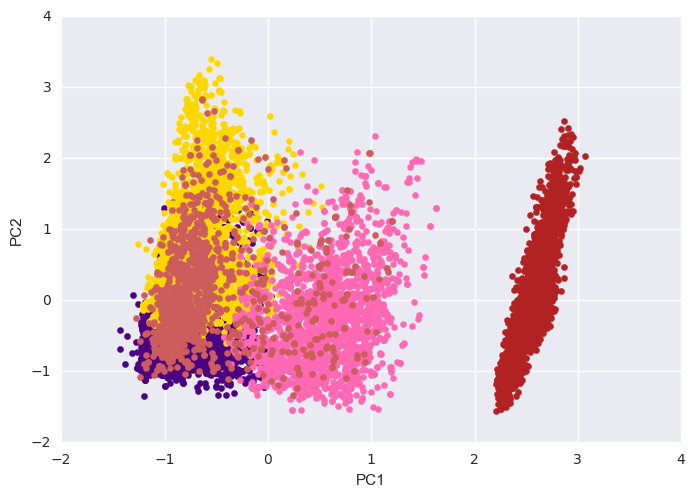

0 indigo
1 gold
2 hotpink
3 firebrick
4 indianred


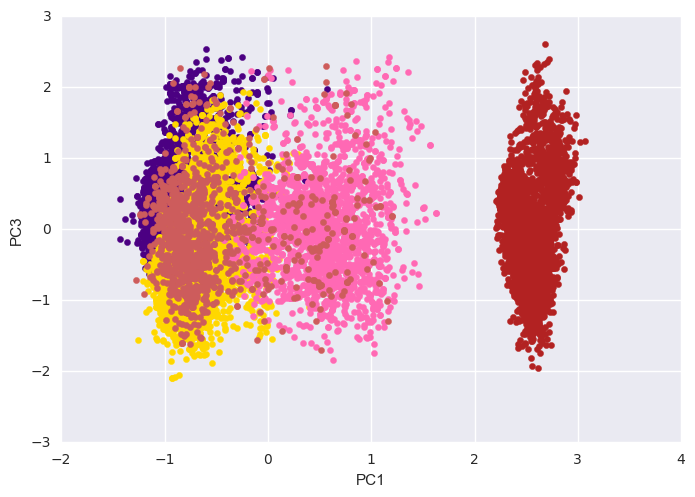

0 indigo
1 gold
2 hotpink
3 firebrick
4 indianred


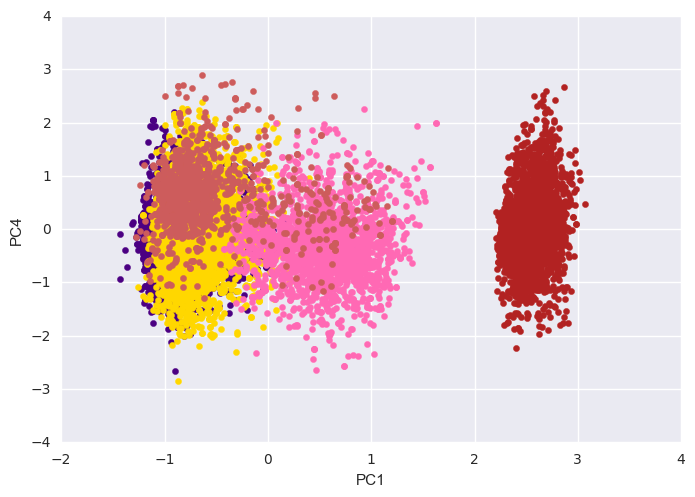

0 indigo
1 gold
2 hotpink
3 firebrick
4 indianred


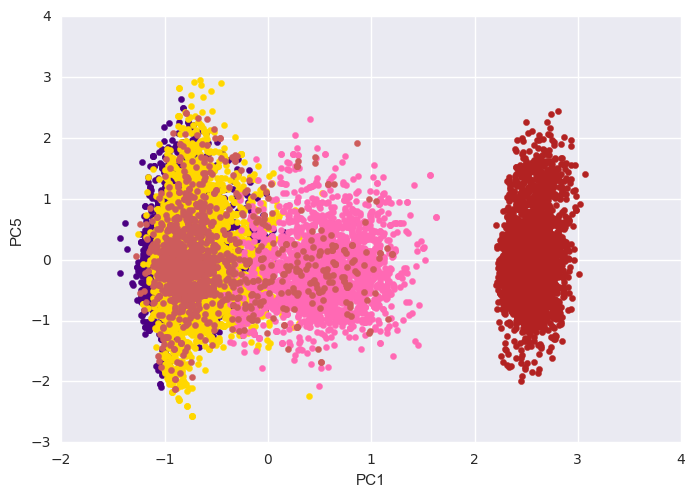

In [260]:
for pc in range(1, 5):
    plt.scatter(X_copy[:, 0], X_copy[:, pc], color='w')
    cmap = plt.get_cmap('gnuplot')
    col = [c for c in colors.cnames]
    #colors = 2 * np.pi * np.random.rand(num_clusters)
    #cmap = plt.cm.get_cmap('Pastel2')
    # my_color_list = ['g','r','y','b','c','m','k', 'b', '', 'p', 'o', 'g']
    for i in range(num_clusters):
        plt.scatter(X_copy[(Y == i), 0], X_copy[(Y == i), pc], color=col[i])

        print i, col[i]
    plt.ylabel('PC'+str(pc+1))
    plt.xlabel('PC1')
    plt.show()

In [261]:
np.unique(Y)

array([0, 1, 2, 3, 4], dtype=int32)